# Paleocurrent directions

This notebook applies rotations to paleocurrent trend and plunge measurements to rotate to horizontal based on bedding tilt. These rotated paleocurrent directions are then plotted on a rose diagram.

## Installing the Python package mplstereonet

If you have not previously installed mplstereonet, run the cells below to install them. This package enables the plotting of directional data on stereonet plots.

In [ ]:
!pip install mplstereonet

## Import scientific python libraries

The `rotation.py` functions that are imported are a small subset of `pmag.py` functions that enable the rotations necessary to apply tilt corrections to the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rotation as rot
import mplstereonet

## Import data

These data were collected at Point Lobos reserve within the Carmelo Formation in June, 2022 and June, 2024.

In [2]:
paleocurrent_data = pd.read_csv('./data/paleocurrent.csv')
print('number of measurements:', len(paleocurrent_data))
paleocurrent_data.tail()

number of measurements: 43


,paleocurrent_trend,paleocurrent_plunge,up_or_down,bedding_dip_direction,bedding_dip,person,note,year,latitude,longitude
38,104,9,up,68,17,Leah,Flame structure flow to WNW,2024.0,36.522104,-121.934577
39,122,7,up,82,6,Leah,Ripple flow to NW,2024.0,36.522226,-121.935015
40,80,31,up,19,58,Leah,Ripple flow to WSW,2024.0,36.512250,-121.943515
41,60,39,up,6,63,Leah,Ripple flow to SW,2024.0,36.512213,-121.943416
42,235,8,down,164,19,Leah,Ripple flow to SW,2024.0,36.513358,-121.944507


## Plot an example measurement

In [7]:
n = 3

dip_direction = paleocurrent_data.bedding_dip_direction[n]
strike = (dip_direction-90)%360
dip = paleocurrent_data['bedding_dip'][n]

trend = paleocurrent_data['paleocurrent_trend'][n]
plunge = paleocurrent_data['paleocurrent_plunge'][n]

print('bedding plane (strike/dip):', strike, '/', dip)
print('paleocurrent (trend-plunge)', trend, '-', plunge)

bedding plane (strike/dip): 285 / 57
paleocurrent (trend-plunge) 50 - 53


/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_29996/3533105135.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


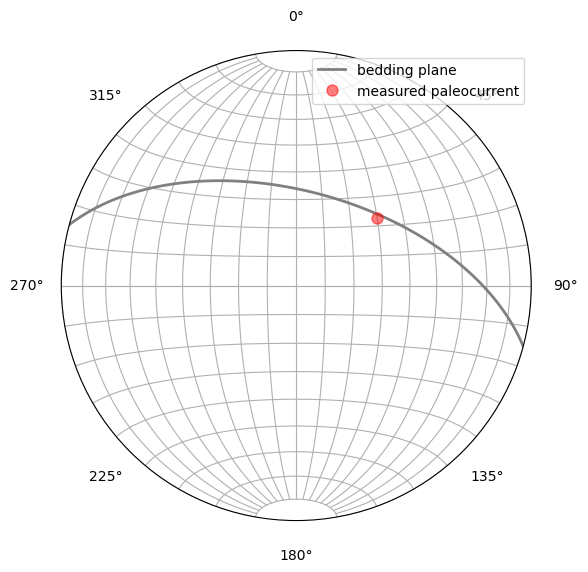

In [8]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='stereonet')

ax.plane(strike, dip, color='grey', linewidth=2, label='bedding plane')
ax.line(plunge, trend, color='red', markersize=8, alpha=0.5, label='measured paleocurrent')
ax.grid()
fig.tight_layout()
plt.legend()
plt.show()

## Correct paleocurrent measurement for bedding tilt

In [9]:
paleocurrent_trend, paleocurrent_plunge = rot.dotilt(trend,plunge,dip_direction,dip)
print('corrected paleocurrent (trend-plunge)', round(paleocurrent_trend), '-', round(paleocurrent_plunge))

corrected paleocurrent (trend-plunge) 35 - 1


/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_29996/3909596762.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


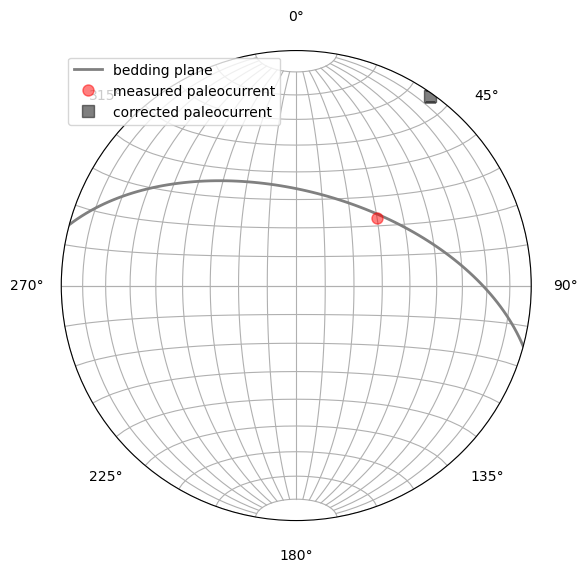

In [10]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='stereonet')

ax.plane(strike, dip, color='grey', linewidth=2, label='bedding plane')
ax.line(plunge, trend, color='red', markersize=8, alpha=0.5, label='measured paleocurrent')
ax.line(paleocurrent_plunge, paleocurrent_trend, color='black', markersize=8, alpha=0.5, marker='s', label='corrected paleocurrent')
ax.grid()
fig.tight_layout()
plt.legend()
plt.show()

## Correct all of the paleocurrents for bedding tilt

In [11]:
paleocurrents = []

for n in paleocurrent_data.index:
    if paleocurrent_data.up_or_down[n] == 'up':
        trend = (paleocurrent_data.paleocurrent_trend[n] + 180.0) % 360.0
        plunge = -paleocurrent_data.paleocurrent_plunge[n]
    elif paleocurrent_data.up_or_down[n] == 'down':
        trend = paleocurrent_data.paleocurrent_trend[n]
        plunge = paleocurrent_data.paleocurrent_plunge[n]
    dip_direction = paleocurrent_data.bedding_dip_direction[n]
    dip = paleocurrent_data.bedding_dip[n]
    paleocurrent_trend, paleocurrent_plunge = rot.dotilt(trend,plunge,dip_direction,dip)
    paleocurrents.append(paleocurrent_trend)
    
paleocurrent_data['corrected_paleocurrent_trend'] = paleocurrents

In [44]:
paleocurrent_data['location'] = None

# Using .loc to set values
paleocurrent_data.loc[paleocurrent_data['latitude'] > 36.52, 'location'] = 'Moss Cove'
paleocurrent_data.loc[paleocurrent_data['latitude'] < 36.52, 'location'] = 'South Shore'

paleocurrent_data_Moss = paleocurrent_data[paleocurrent_data.location == 'Moss Cove']
paleocurrent_data_South = paleocurrent_data[paleocurrent_data.location == 'South Shore']

paleocurrent_data.to_csv('./data/paleocurrent_corrected.csv', index=False)

In [15]:
paleocurrent_data

,paleocurrent_trend,paleocurrent_plunge,up_or_down,bedding_dip_direction,bedding_dip,person,note,year,latitude,longitude,corrected_paleocurrent_trend,location
0,229,2,down,84,19,Nick S-H,flame structure verging to SW,NaN,36.522375,-121.934668,227.071975,Moss Cove
1,9,49,up,13,52,Nick S-H,flute casts; flow to south,2022.0,36.512357,-121.943502,190.373548,South Shore
2,40,42,up,6,52,Nick S-H,current ripple; flow to southwest,2022.0,36.512254,-121.943461,210.625747,South Shore
3,50,53,up,15,57,Nick S-H,current ripple; flow to southwest,2022.0,36.512193,-121.943417,215.198088,South Shore
4,67,46,up,24,62,Nick S-H,current ripple; flow to southwest,2022.0,36.512249,-121.943611,232.469730,South Shore
5,60,23,up,21,30,Nick S-H,current ripple; flow to southwest,2022.0,36.512373,-121.943628,236.408381,South Shore
6,220,8,down,175,16,Nick S-H,current ripple; flow to southwest,2022.0,36.512995,-121.943730,219.543986,South Shore
7,217,10,down,175,16,Nick S-H,current ripple; flow to southwest,2022.0,36.513000,-121.943722,216.251424,South Shore
8,226,7,down,175,16,Nick S-H,current ripple; flow to southwest,2022.0,36.512998,-121.943742,225.581044,South Shore
9,214,11,down,175,16,Nick S-H,current ripple; flow to southwest,2022.0,36.513004,-121.943758,213.168840,South Shore


/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_29996/4089369067.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


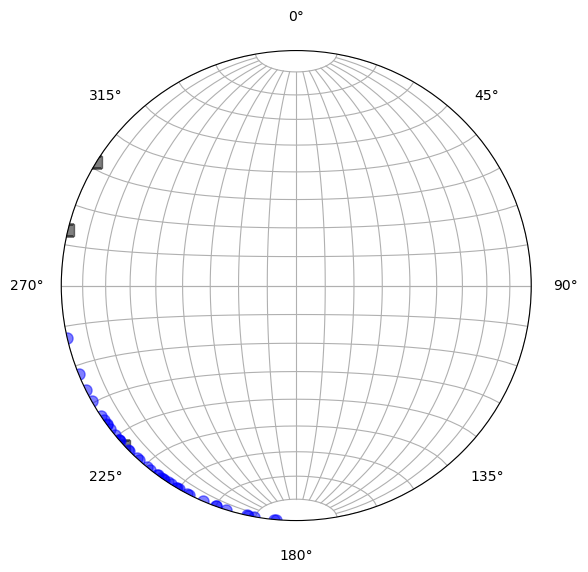

In [17]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='stereonet')

ax.line(np.zeros(len(paleocurrent_data_Moss)), paleocurrent_data_Moss['corrected_paleocurrent_trend'], 
        color='black', markersize=8, alpha=0.5, marker='s', label='corrected paleocurrent')
ax.line(np.zeros(len(paleocurrent_data_South)), paleocurrent_data_South['corrected_paleocurrent_trend'], 
        color='blue', markersize=8, alpha=0.5, marker='o', label='corrected paleocurrent')
ax.grid()
fig.tight_layout()
plt.show()

## Make a rose diagram

The data are hard to interpret when they are all plotted up. To more effectively visualize the data, we can make a directional histogram called a rose diagram that bins the data by angle. We will first create the bins and then determine how many vectors are in each bin.

In [18]:
bin_edges = np.arange(0, 370, 10)
number_of_paleocurrents_south, bin_edges = np.histogram(paleocurrent_data_South['corrected_paleocurrent_trend'], bin_edges)
number_of_paleocurrents_moss, bin_edges = np.histogram(paleocurrent_data_Moss['corrected_paleocurrent_trend'], bin_edges)

In [19]:
number_of_paleocurrents_south

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  2,  4,  6, 11,  7,  6,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0])

In [20]:
number_of_paleocurrents_moss

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [12]:
bin_edges

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360])

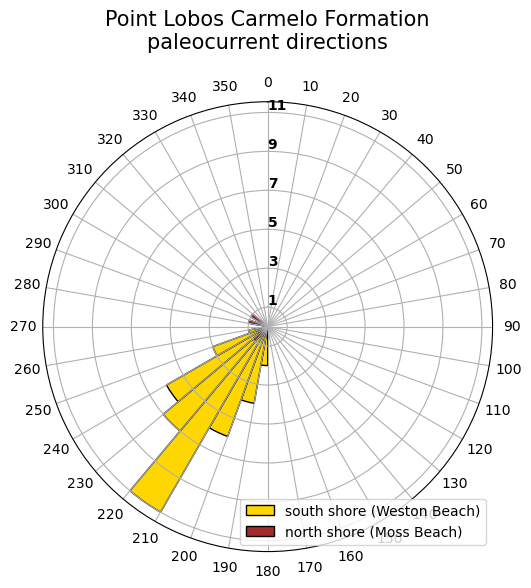

In [26]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(1,1,1, projection='polar')

ax.bar(np.deg2rad(np.arange(5, 365, 10)), number_of_paleocurrents_south, 
       width=np.deg2rad(10), bottom=0.0, color='gold', edgecolor='k', label='south shore (Weston Beach)')
ax.bar(np.deg2rad(np.arange(5, 365, 10)), number_of_paleocurrents_moss, 
       width=np.deg2rad(10), bottom=0.0, color='brown', edgecolor='k', label='north shore (Moss Beach)')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
ax.set_rgrids(np.arange(1, number_of_paleocurrents_south.max() + 1, 2), angle=0, weight= 'black')
ax.set_title('Point Lobos Carmelo Formation\npaleocurrent directions', y=1.10, fontsize=15)
plt.legend(loc='lower right')
fig.tight_layout()
plt.savefig('./paleocurrent_rose.pdf')

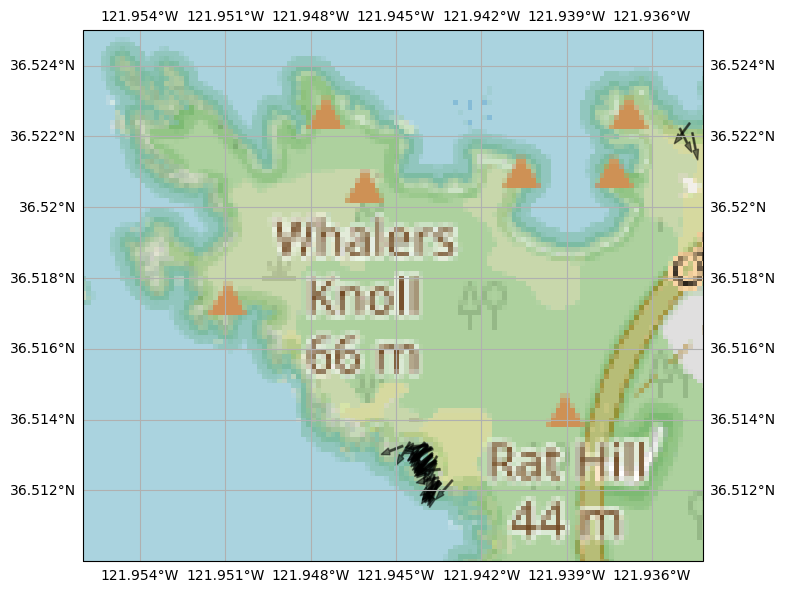

In [43]:
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

osm_tiles = cimgt.OSM()

fig = plt.figure(figsize=(8,8))

# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1, 1, 1, projection=osm_tiles.crs)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([-121.956, -121.9342, 36.51, 36.525], crs=ccrs.Geodetic())

# Add the Stamen data at zoom level 8.
ax.add_image(osm_tiles, 13)

# ax.scatter(paleocurrent_data['longitude'],paleocurrent_data['latitude'],
#            transform=ccrs.PlateCarree(), color='red')


# Convert trends from degrees to radians
trends_rad = np.deg2rad(paleocurrent_data['corrected_paleocurrent_trend'])

# Define arrow properties
arrow_length = 0.0005  # Length of arrows

# Plot arrows
for lon, lat, trend in zip(paleocurrent_data['longitude'], paleocurrent_data['latitude'], trends_rad):
    dx = arrow_length * np.cos(trend)
    dy = arrow_length * np.sin(trend)
    ax.arrow(lon, lat, dx, dy, transform=ccrs.PlateCarree(), color='black', 
             head_width=0.0002, width=0.00005, alpha=0.5)

ax.gridlines(draw_labels=True)
plt.show()